In [1]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

In [2]:
data = []
with open('data105882.csv','rb') as dataset:
    dataReader = csv.reader(dataset)
    for row in dataReader:
        data.append(row)
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])

data = np.array(data)
labels = data[:,7]
data = data[:,:7]

The above reads in data, creating a 7D feature matrix and a corresponding ground truth vector.

In [3]:
for i in range(len(data[0])):
    mu = np.mean(data[:,i])
    sig = np.std(data[:,i])
    data[:,i]= (data[:,i]-mu)/sig

Data Standardised. I.E demeaned and variance given unit length.

In [4]:
phi = scipy.spatial.distance_matrix(data,data)

phi = np.array(phi)

phinv = np.linalg.pinv(phi)

Phi function is the identity function. I.E, $\phi(\underline{x}) = dist(\underline{x})$. Each datapoint is a center and the matrix $\phi$ consists of the distance from each datapoint $x_{i}$ to every other datapoint. Resulting in zeroes on the diagonal.

In [5]:
w = np.matmul(phinv,labels)

In [6]:
y = phi.dot(w)

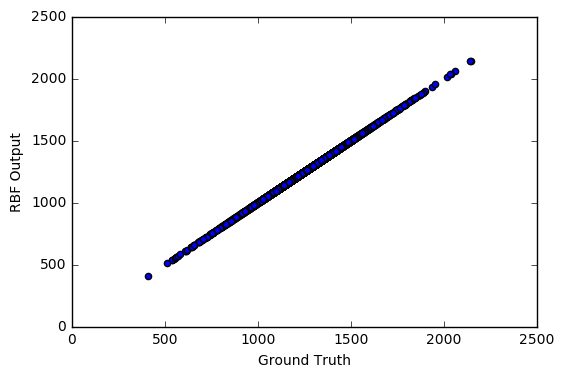

In [7]:
plt.scatter(labels,y)
plt.xlabel('Ground Truth')
plt.ylabel('RBF Output')

Full interpolation, ground truth plot against rbf output. $x$ = $y$

The definition of overfitting so bad.

In [103]:
def kmeans(k):
    c = np.random.randint(0,len(data),size=k)
    centres = []
    centres+=(data[i]for i in c)
    centres = np.array(centres)
    eta = 1
    sse = 0
    for k in range(10):
        for i in range(len(data)):
            nearest = 0
            nearest_dist = np.inf
            for j in range(len(centres)):
                dist = scipy.spatial.distance.euclidean(data[i],centres[j])
                if dist < nearest_dist:
                    nearest = j
                    nearest_dist = dist
            deltC = eta*(data[i]-centres[nearest])
            centres[nearest] += deltC
            sse+= nearest_dist**2
    #plt.scatter(data[:,0], data[:,1])
    #plt.scatter(centres[:,0],centres[:,1], c='r')
    return centres,sse

In [ ]:
kVals = np.arange(100,1100,step=100)

errs = []
for k in kVals:
    centres, sse = kmeans(k)
    errs.append(sse)

Running the kMeans algorithm with multiple values for $k$ and assessing the Sum of Square errors for each $k$ value. The SSE is computed by summing the squared distance between each datapoint and it's center.

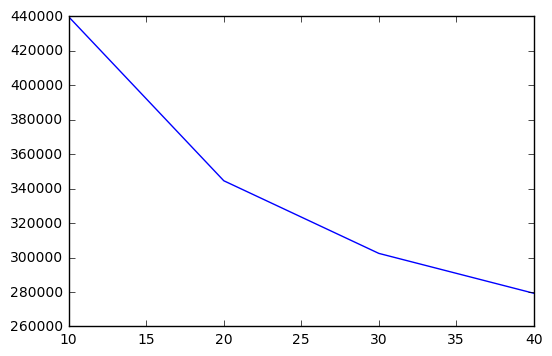

In [101]:
plt.plot(kVals,errs)